# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter / union

In [16]:
d1 = "Think like a man a action and act like man of thought"
d2 = "Try no to become a man of success but rather try to become a man of value"
d3 = "Give me Liberty, of give me daeth"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.17647058823529413
0.07142857142857142
0.0625


In [17]:
tiv = TfidfVectorizer()
corpus  = [d1, d2 ,d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.19376448]]
[[0.03175196]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [18]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 56.1MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 460kB 30.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [21]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [39.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [37]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [38]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [39]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [42]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [43]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [44]:
word2vec.most_similar('영화')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('마음', 0.9648211002349854),
 ('작품', 0.9552459716796875),
 ('듯', 0.951880693435669),
 ('이야기', 0.9489853978157043),
 ('깊이', 0.9485987424850464),
 ('가슴', 0.9481625556945801),
 ('보석', 0.94748854637146),
 ('표현', 0.945906400680542),
 ('행복', 0.943644642829895),
 ('따뜻', 0.9418594837188721)]

* t-sne을 이용한 단어 벡터 시각화

In [45]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [48]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.22716908, -0.02125304,  0.2916552 , ...,  0.01266913,
         0.17993517,  0.06607113],
       [-0.5964736 ,  0.01974379,  0.61638916, ...,  0.23557802,
         0.26159155,  0.11044989],
       [-0.43963748, -0.0755062 ,  0.3449658 , ..., -0.17739426,
        -0.5293613 , -0.16331422],
       ...,
       [-0.02936831, -0.00695935,  0.03229445, ...,  0.00306367,
         0.0226266 ,  0.01931292],
       [-0.03629417, -0.01855946,  0.04046763, ...,  0.00079731,
         0.03099952,  0.02310274],
       [-0.02214847, -0.0173296 ,  0.02242819, ...,  0.00140843,
         0.02880399,  0.01093032]], dtype=float32)

In [49]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index =vocab, columns=['x', 'y'])
df[0:10]

,x,y
어릴,-20.921171,15.024276
때,-48.923092,-18.164801
보,-46.069172,-22.415070
고,-45.211849,-21.026951
지금,-45.796444,-17.884396
다시,-45.366524,-20.239714
봐도,-63.757549,-2.039473
재밌,-66.335815,1.433723
어요,-65.132027,0.746906
ㅋㅋ,-64.378296,3.629061


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


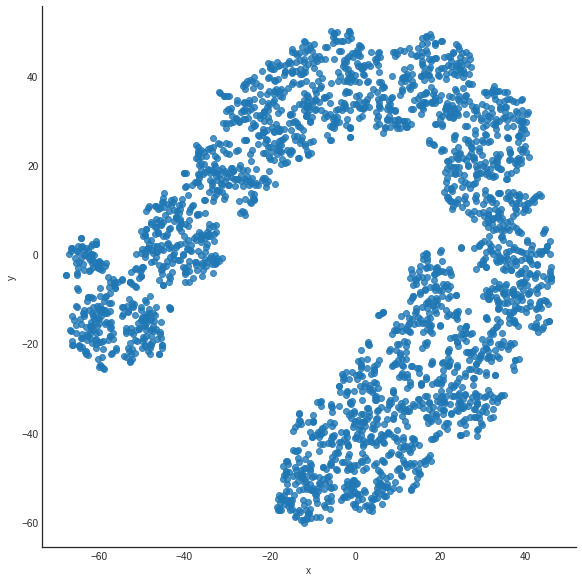

In [51]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y', data=df, fit_reg=False, size=8)
plt.show()


## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [56]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([5, 2, 2, ..., 4, 4, 4])

In [57]:
results = df
results['predicts'] = predict
results[:10]

,x,y,predicts
어릴,-20.921171,15.024276,5
때,-48.923092,-18.164801,2
보,-46.069172,-22.415070,2
고,-45.211849,-21.026951,2
지금,-45.796444,-17.884396,2
다시,-45.366524,-20.239714,2
봐도,-63.757549,-2.039473,2
재밌,-66.335815,1.433723,2
어요,-65.132027,0.746906,2
ㅋㅋ,-64.378296,3.629061,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


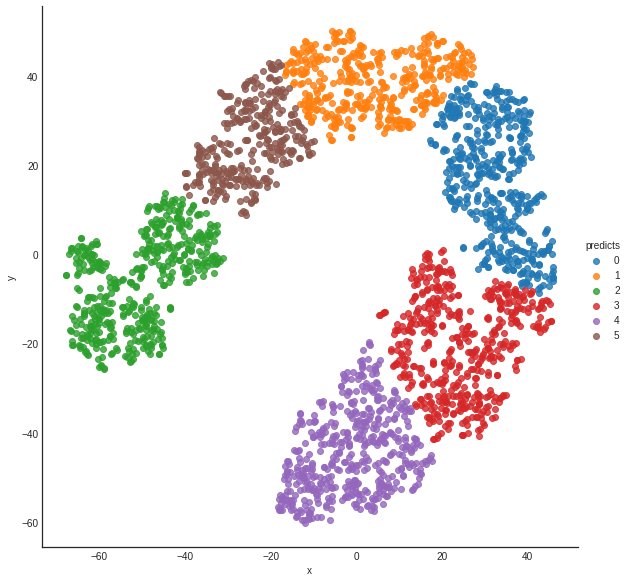

In [59]:
sns.lmplot('x','y', data=results, fit_reg=False, size=8, hue='predicts')
plt.show()

#### average

In [60]:
avg = AgglomerativeClustering(n_clusters =6, linkage='average')
predict = avg.fit_predict(df)
predict

array([5, 2, 2, ..., 3, 3, 3])

In [62]:
results = df
results['predict'] = predict
results[:10]

,x,y,predicts,predict
어릴,-20.921171,15.024276,5,5
때,-48.923092,-18.164801,2,2
보,-46.069172,-22.415070,2,2
고,-45.211849,-21.026951,2,2
지금,-45.796444,-17.884396,2,2
다시,-45.366524,-20.239714,2,2
봐도,-63.757549,-2.039473,2,2
재밌,-66.335815,1.433723,2,2
어요,-65.132027,0.746906,2,2
ㅋㅋ,-64.378296,3.629061,2,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


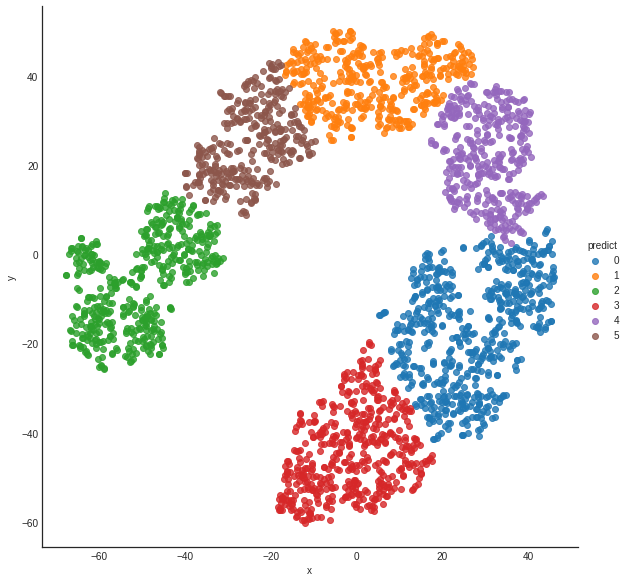

In [63]:
sns.lmplot('x','y', data=results, fit_reg=False, size=8, hue='predict')
plt.show()

#### complete

In [65]:
complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = complete.fit_predict(df)
predict

array([4, 2, 2, ..., 3, 3, 3])

In [67]:
results = df
results['predict'] = predict
results[:10]

,x,y,predicts,predict
어릴,-20.921171,15.024276,5,4
때,-48.923092,-18.164801,2,2
보,-46.069172,-22.415070,2,2
고,-45.211849,-21.026951,2,2
지금,-45.796444,-17.884396,2,2
다시,-45.366524,-20.239714,2,2
봐도,-63.757549,-2.039473,2,2
재밌,-66.335815,1.433723,2,2
어요,-65.132027,0.746906,2,2
ㅋㅋ,-64.378296,3.629061,2,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


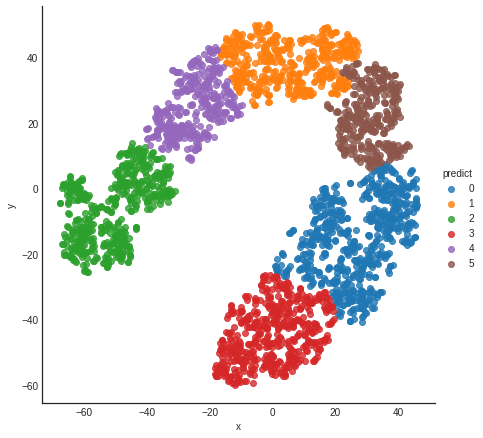

In [69]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [73]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')

row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,43.573184,45.245182,43.620270,41.409659,43.059543,46.250695,47.541487,46.598745,45.070751,56.257885,54.110740,56.339615,53.320575,55.384617,57.165035,58.945006,54.230042,56.485247,56.443698,53.206870,74.296295,51.524237,46.155928,50.220724,53.713291,36.272193,47.484772,43.183559,24.184520,52.827707,30.393599,54.762941,46.112001,67.424351,32.283446,54.951972,40.133743,40.039937,37.434978,...,58.382238,57.744592,51.672035,69.181828,61.554101,67.607490,47.564705,44.151000,70.190182,71.201090,64.572972,63.503493,50.880315,64.066892,58.619682,49.728771,62.880022,74.990834,56.720571,53.849542,69.840499,52.719881,61.941336,35.140645,61.259422,72.196041,60.686515,57.912395,56.509378,49.534179,51.999333,70.465710,45.612982,69.255246,62.797051,63.748711,69.656316,66.135932,69.050229,73.091821
1,43.573184,0.000000,5.119536,4.686707,3.139196,4.117577,21.910895,26.216504,24.907473,26.717704,14.420554,17.422591,14.670664,94.911329,16.541649,17.538345,85.031358,16.684773,15.890469,16.038582,12.016010,64.467594,94.315576,88.759924,6.685261,12.853623,78.767434,24.100303,8.596163,32.309892,13.333278,22.530407,15.024088,2.944883,78.200424,18.235155,15.281646,3.824271,3.652808,79.835572,...,49.029809,84.641937,46.473595,55.169187,43.379507,52.521830,67.533724,68.848484,86.644549,50.632179,89.919138,47.383432,45.923966,44.867299,76.458218,48.815980,64.371231,57.568490,46.176842,43.707470,59.406215,46.806188,56.404132,78.219589,88.317148,63.983317,51.716477,44.040004,70.713371,61.022778,80.560967,58.322752,70.911629,53.398002,68.332574,46.256915,57.450373,48.165679,54.152125,53.380782
2,45.245182,5.119536,0.000000,1.631526,4.538875,2.286020,26.982284,31.296993,29.997826,31.835840,16.605306,21.370794,16.945030,95.438004,19.954022,20.571361,83.099835,20.479007,18.652233,18.876674,14.919648,59.729292,95.358801,89.735519,7.569654,15.826958,80.852491,29.158108,13.686954,36.318948,16.855897,26.956668,18.257113,6.538248,74.784000,22.712763,18.514864,8.135148,7.603844,81.967311,...,44.573938,82.814818,42.436321,50.318774,38.480380,47.650114,65.265226,67.073341,83.629901,45.570908,87.824522,42.528570,41.929579,39.900072,73.754425,45.082401,60.406528,52.557440,41.706531,39.343560,54.693514,42.693700,52.060987,79.774047,86.451530,59.341131,47.225830,39.385368,67.766730,58.068708,79.012595,53.530490,69.152361,48.480787,64.626752,41.349258,52.665183,43.212779,49.270595,48.326782
3,43.620270,4.686707,1.631526,0.000000,3.196467,0.802288,26.541803,30.833486,29.511258,31.229338,17.525022,21.728000,17.843540,93.879013,20.517828,21.268687,81.954410,20.898151,19.423617,19.626122,15.615881,59.789978,93.758785,88.139445,8.620563,16.510408,79.221639,28.742075,13.228946,34.911264,17.360622,25.695688,18.874159,6.776021,74.105873,21.486299,19.133494,7.066535,6.457304,80.336881,...,44.417912,81.643665,42.030134,50.487235,38.706447,47.841868,64.201620,65.883892,82.804295,46.039668,86.722055,42.703637,41.500685,40.211951,72.822858,44.528097,59.969560,52.928263,41.559942,39.125802,54.732223,42.328187,51.833047,78.149070,85.290708,59.322081,47.094081,39.376398,66.912749,57.212986,77.775760,53.640723,67.960007,48.724237,64.067384,41.583967,52.768832,43.503254,49.472731,48.777841
4,41.409659,3.139196,4.538875,3.196467,0.000000,2.394234,23.951260,28.196729,26.851260,28.427346,17.499493,20.450428,17.761898,92.298574,19.662638,20.677056,81.906208,19.751216,19.024523,19.175460,15.149870,62.095660,91.897334,86.312488,9.305778,15.991144,76.835451,26.172412,10.760828,31.781745,16.452493,22.500849,18.159266,6.041122,75.167201,18.289940,18.416504,3.988921,3.322770,77.929526,...,46.443033,81.523647,43.661522,52.942173,41.249385,50.328805,64.396445,65.731786,83.544024,48.

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

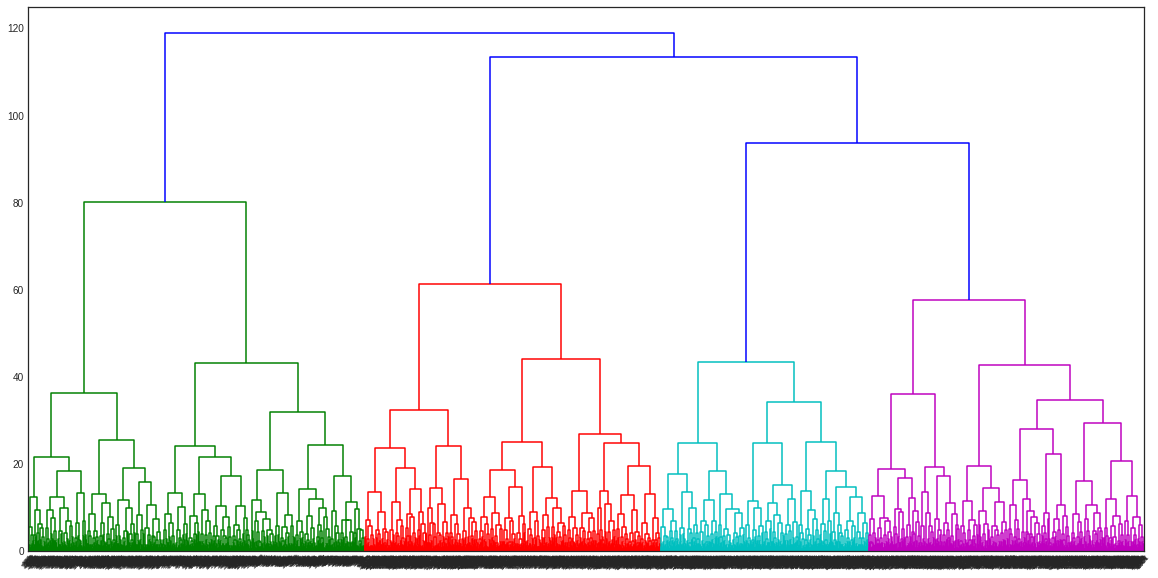

In [74]:
row_clusters = linkage(distmatrix, method="complete")

plt.figure(figsize=(20, 10))

dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

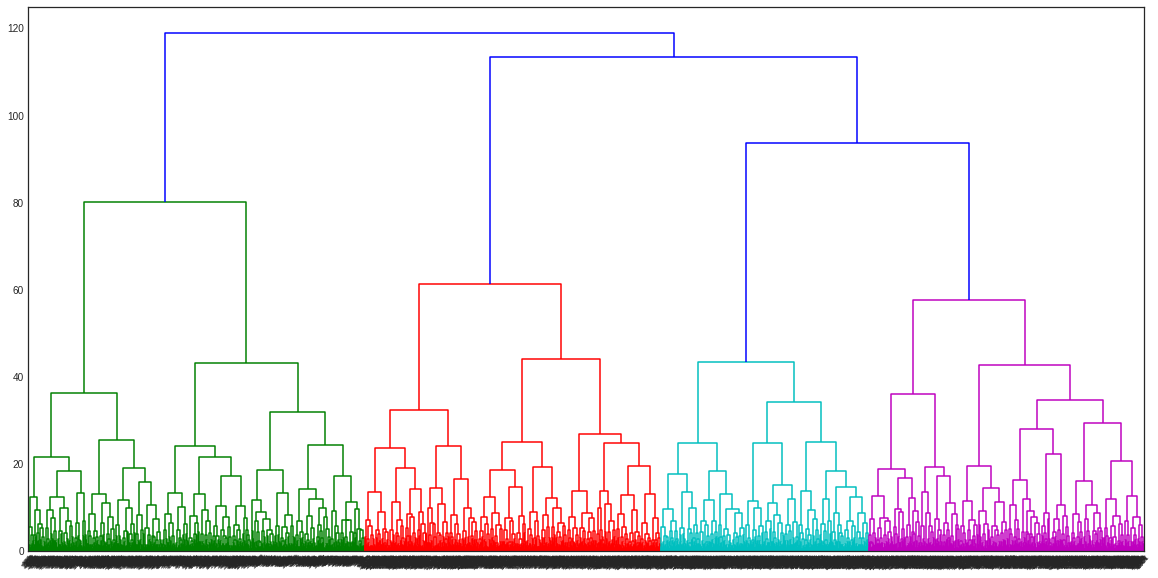

In [76]:
mergins= linkage(df, method='complete')

plt.figure(figsize=(20,10))

dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [78]:
results = df
results['predicts'] = predict
results[:10]

,x,y,predicts,predict
어릴,-20.921171,15.024276,2,4
때,-48.923092,-18.164801,2,2
보,-46.069172,-22.415070,2,2
고,-45.211849,-21.026951,2,2
지금,-45.796444,-17.884396,2,2
다시,-45.366524,-20.239714,2,2
봐도,-63.757549,-2.039473,2,2
재밌,-66.335815,1.433723,2,2
어요,-65.132027,0.746906,2,2
ㅋㅋ,-64.378296,3.629061,2,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


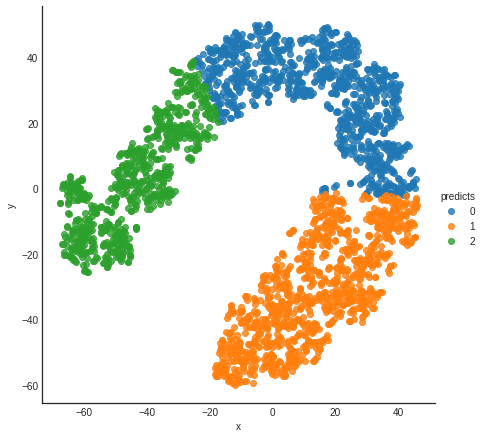

In [80]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predicts')

### 클러스터 개수 6

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([2, 5, 5, ..., 0, 0, 0], dtype=int32)

In [82]:
results = df
results['predicts'] = predict
results[:10]

,x,y,predicts,predict
어릴,-20.921171,15.024276,2,4
때,-48.923092,-18.164801,5,2
보,-46.069172,-22.415070,5,2
고,-45.211849,-21.026951,5,2
지금,-45.796444,-17.884396,5,2
다시,-45.366524,-20.239714,5,2
봐도,-63.757549,-2.039473,5,2
재밌,-66.335815,1.433723,5,2
어요,-65.132027,0.746906,5,2
ㅋㅋ,-64.378296,3.629061,5,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


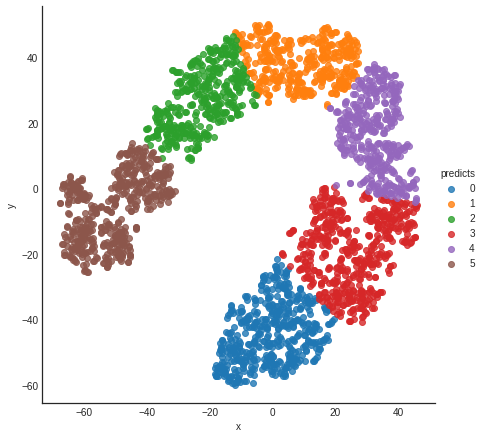

In [83]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predicts')